In [4]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [5]:
X = np.load('../../data/processed_data/specgram_db0.npy')
print(X.shape)

(440, 130, 64)


In [6]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(440, 130, 64, 1)


In [7]:
df = pd.read_csv("../../data/processed_data/metadata.csv")
df = df.sort_values(by='filename', ascending=True)
df = df.reset_index(drop=True)
df
category_to_number = {'brushing': 0, 'food': 1, 'isolation': 2}

# Create a new column with numerical values based on the mapping
df['numerical_situation'] = df['situation'].map(category_to_number)

y = df['numerical_situation']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [9]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
                                                                 test_size=.2,
                                                                   shuffle=True,
                                                                   random_state=41,
                                                                   stratify=y_train)

In [10]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical

# for earlier versions of keras run this instead
# from keras.utils import to_categorical
# instead of running
# from keras.utils.np_utils import to_categorical
# or look up the documentation for your version

In [11]:
## We've seen this before
model = models.Sequential()

In [12]:
## adding our first convolutional layer

## Conv2D(32, specifies that we want a convolutional layer with depth 32
## (3,3) is our sliding grid size
## We're using the relu activation function
## and our images are a gray scale value for 28X28 pixels, hence the input_shape
model.add( layers.Conv2D(32, (6,3), activation='relu', input_shape=(130,64,1,) ) )


## adding our first Max Pooling layer
## MaxPooling2D((2,2) tells python we want to add
## a max pooling layer that uses a (2,2) square grid
## strides = 2, sets the stride value to 2
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )


## Add another layer, alternating between conv and pool
model.add( layers.Conv2D(64, (6,3), activation='relu'))
model.add( layers.MaxPooling2D( (2,2), strides=2) )



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 62, 32)       608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 14, 64)        0         
 g2D)                                                            
                                                                 
Total params: 37536 (146.62 KB)
Trainable params: 37536 (146.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
## Now we'll add the fully connected layer

## .Flatten() will flatten the data for us,
## meaning the last output data will turn into 
## a vector
model.add( layers.Flatten() )

## We've seen these before
## Then we add a single dense hidden layer
## This is 64 nodes high
model.add(layers.Dense(64, activation='relu'))


## Finally an output layer
model.add(layers.Dense(3, activation='softmax'))

In [15]:
## We've seen this before in the last notebook
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
## we'll go for 10 epochs
## This is slow!
epochs=100
history = model.fit(X_train_train, 
                      to_categorical(y_train_train), 
                      epochs=epochs, 
                      batch_size=512,
                      validation_data=(X_val,to_categorical(y_val)))

Epoch 1/100
1/1 [==============================] - 1s 630ms/step - loss: 0.9284 - accuracy: 0.5694 - val_loss: 1.1175 - val_accuracy: 0.4930
Epoch 2/100
1/1 [==============================] - 1s 582ms/step - loss: 0.9158 - accuracy: 0.5587 - val_loss: 1.1384 - val_accuracy: 0.4507
Epoch 3/100
1/1 [==============================] - 1s 589ms/step - loss: 0.9082 - accuracy: 0.6014 - val_loss: 1.1450 - val_accuracy: 0.4930
Epoch 4/100
1/1 [==============================] - 1s 571ms/step - loss: 0.9398 - accuracy: 0.5730 - val_loss: 1.1158 - val_accuracy: 0.3803
Epoch 5/100
1/1 [==============================] - 1s 619ms/step - loss: 0.9025 - accuracy: 0.5801 - val_loss: 1.2507 - val_accuracy: 0.5070
Epoch 6/100
1/1 [==============================] - 1s 561ms/step - loss: 0.9687 - accuracy: 0.5231 - val_loss: 1.2079 - val_accuracy: 0.2535
Epoch 7/100
1/1 [==============================] - 1s 576ms/step - loss: 0.9482 - accuracy: 0.5587 - val_loss: 1.1014 - val_accuracy: 0.5070
Epoch 8/100
1

Epoch 59/100
1/1 [==============================] - 1s 571ms/step - loss: 1.3711 - accuracy: 0.3772 - val_loss: 2.2647 - val_accuracy: 0.5070
Epoch 60/100
1/1 [==============================] - 1s 558ms/step - loss: 1.7917 - accuracy: 0.5338 - val_loss: 1.4281 - val_accuracy: 0.3944
Epoch 61/100
1/1 [==============================] - 1s 568ms/step - loss: 1.1714 - accuracy: 0.4555 - val_loss: 1.5250 - val_accuracy: 0.5070
Epoch 62/100
1/1 [==============================] - 1s 577ms/step - loss: 1.1468 - accuracy: 0.5338 - val_loss: 1.2084 - val_accuracy: 0.2817
Epoch 63/100
1/1 [==============================] - 1s 591ms/step - loss: 0.9518 - accuracy: 0.4804 - val_loss: 1.1843 - val_accuracy: 0.5352
Epoch 64/100
1/1 [==============================] - 1s 554ms/step - loss: 0.8545 - accuracy: 0.5979 - val_loss: 1.1702 - val_accuracy: 0.3662
Epoch 65/100
1/1 [==============================] - 1s 563ms/step - loss: 0.7867 - accuracy: 0.6299 - val_loss: 11.7104 - val_accuracy: 0.5070
Epoch

In [18]:
history_dict = history.history

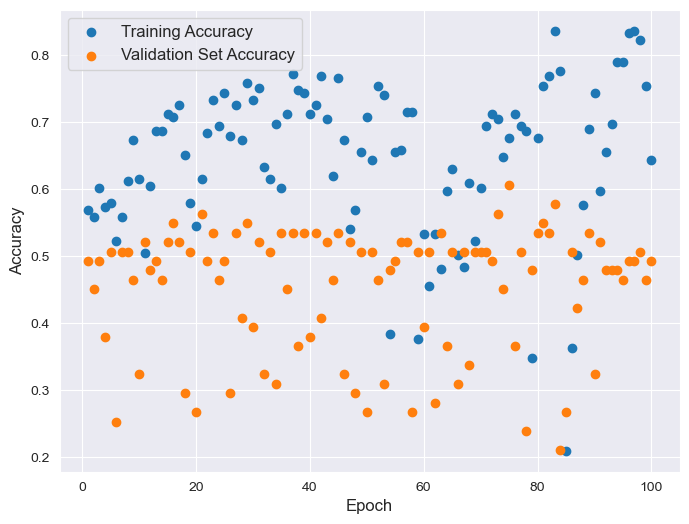

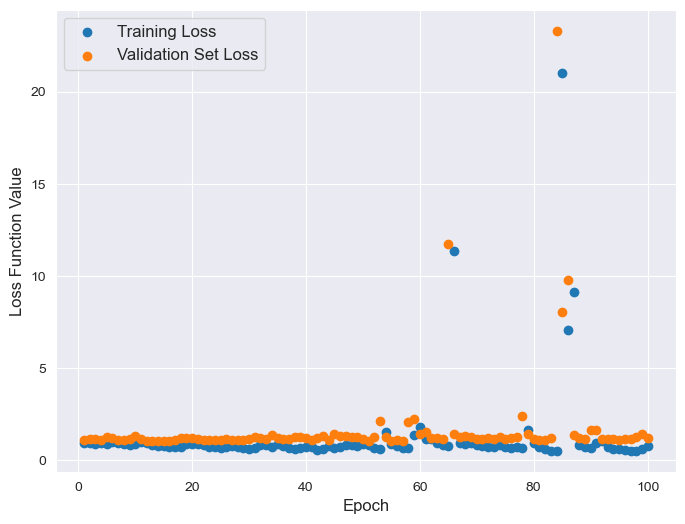

In [19]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()


plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()